In [58]:
import pandas as pd
import  numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy .stats import norm,binom,geom,poisson,expon
from scipy.stats import f_oneway,kruskal
from scipy.stats import shapiro,levene
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import pearsonr,spearmanr 

In [5]:
#Import the dataset

df=pd.read_csv("C:/Users/DELL/Downloads/walmart_data.csv")

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [8]:
#Display summary statistics of the dataset
df.describe() 

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
#Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
#Display the first few rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
#Display the last few rows of the dataset
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [12]:
#Display the shape of the dataset
df.shape

(550068, 10)

In [13]:
#Display the data types of each column in the dataset
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [14]:
#Missing Value Detection
missing_values=df.isnull().sum()
missing_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [16]:
#Conversion of categorical attributes to 'Category'
df["Occupation"]=df["Occupation"].astype("category")
df["Marital_Status"]=df["Marital_Status"].astype("category")
df["Product_Category"]=df["Product_Category"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["Age"]=df["Age"].astype("category")
df["City_Category"]=df["City_Category"].astype("category")
("data_types:",df.dtypes)
                

('data_types:',
 User_ID                          int64
 Product_ID                      object
 Gender                        category
 Age                           category
 Occupation                    category
 City_Category                 category
 Stay_In_Current_City_Years      object
 Marital_Status                category
 Product_Category              category
 Purchase                         int64
 dtype: object)

In [17]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
#Non-Graphical Analysis: Value counts and unique attributes 


In [21]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [22]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [23]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [24]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [25]:
df["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [26]:
df["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [27]:
#To check the number of unique values in each other
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [28]:
# Visual Analysis - Univariate & Bivariate
# 1.For continuous variable(s): Distplot, countplot, histogram for univariate analysis
# 2.For categorical variable(s): Boxplot
# 3.For correlation: Heatmaps, Pairplots

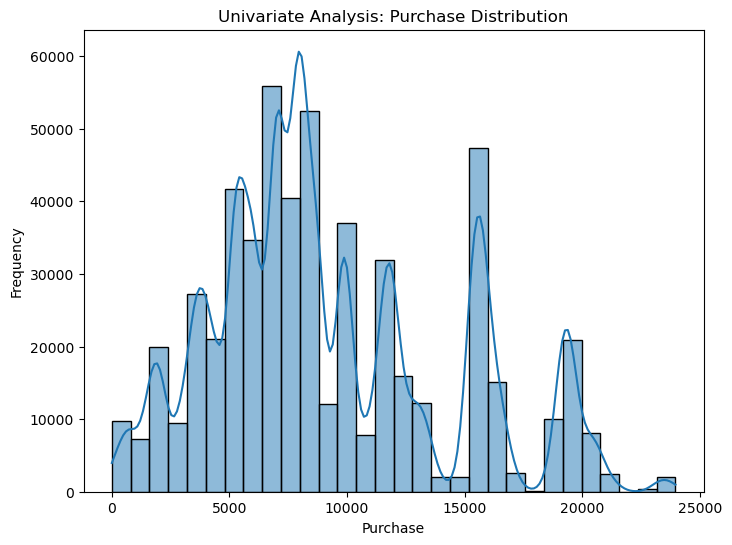

In [39]:
#Univariate Analysis
#Plot a histogram for the 'Purchase' column
plt.figure(figsize=(8,6))
sns.histplot(df['Purchase'],bins=30,kde=True)
plt.title('Univariate Analysis: Purchase Distribution')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

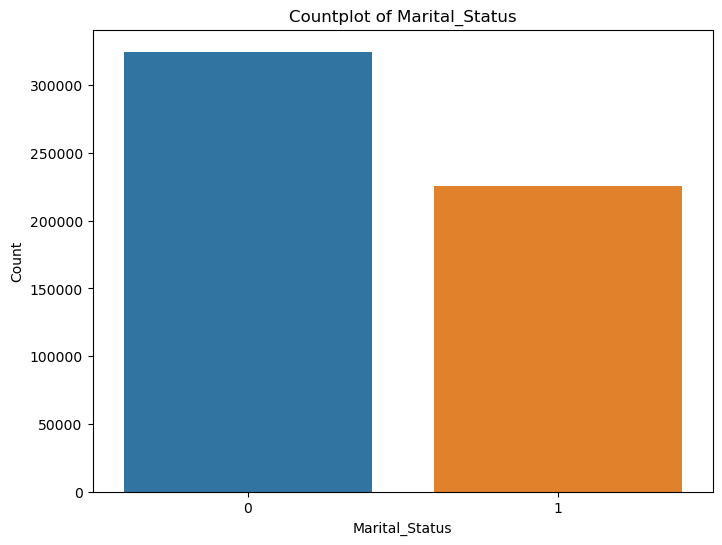

In [30]:
#Countplot for the marital_status column
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_Status',data=df)
plt.title('Countplot of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Above Countplot shows that unmarried peoples have purchased more than married peoples.

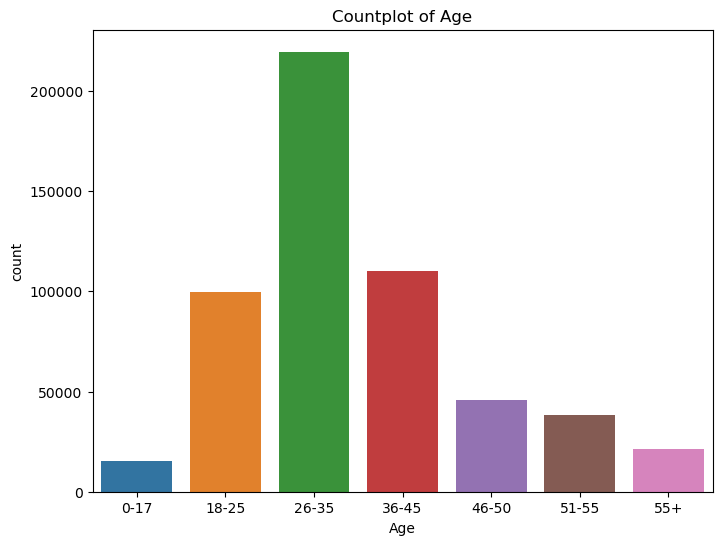

In [37]:
#Countplot for the Age column
plt.figure(figsize=(8,6))
sns.countplot(x="Age",data=df)
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

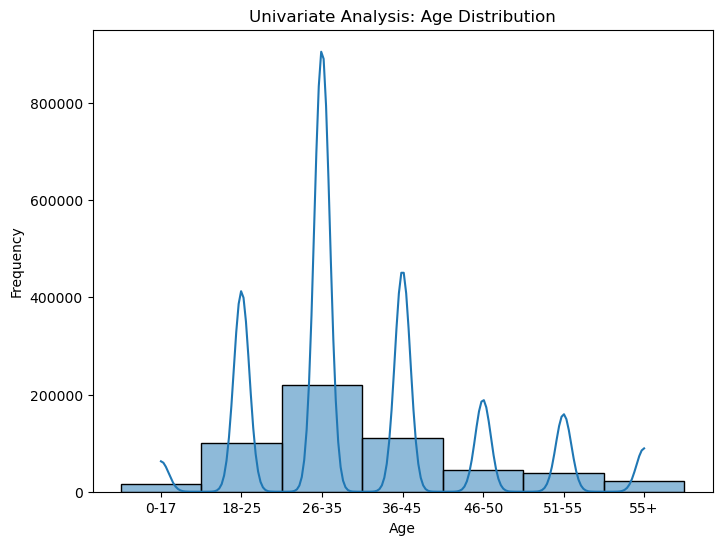

In [39]:
#plot a histogram for Age column
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Univariate Analysis: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#It's shows that people aged between 26 to 35 have purchased the more products 
# and people aged between 0 to 17 have purchased the less products.


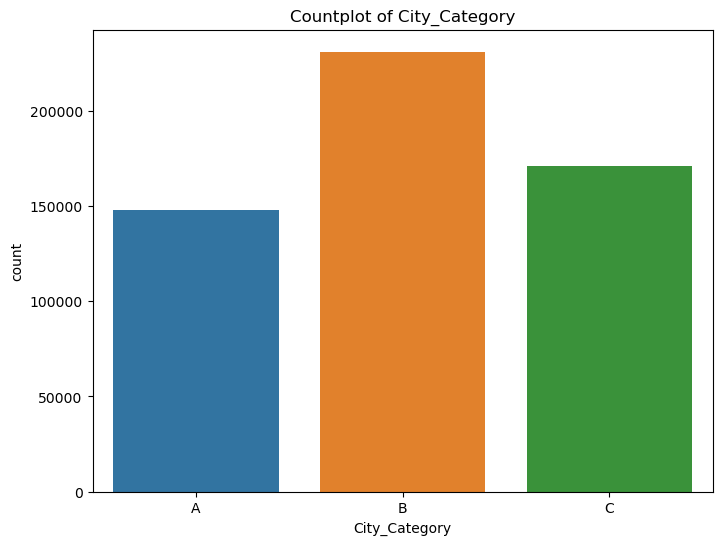

In [40]:
#Countplot for the City_Category column
plt.figure(figsize=(8,6))
sns.countplot(x="City_Category",data=df)
plt.title('Countplot of City_Category')
plt.xlabel('City_Category')
plt.ylabel('count')
plt.show()

In [ ]:
# City_Category B have more purchased product compared to A And C. 

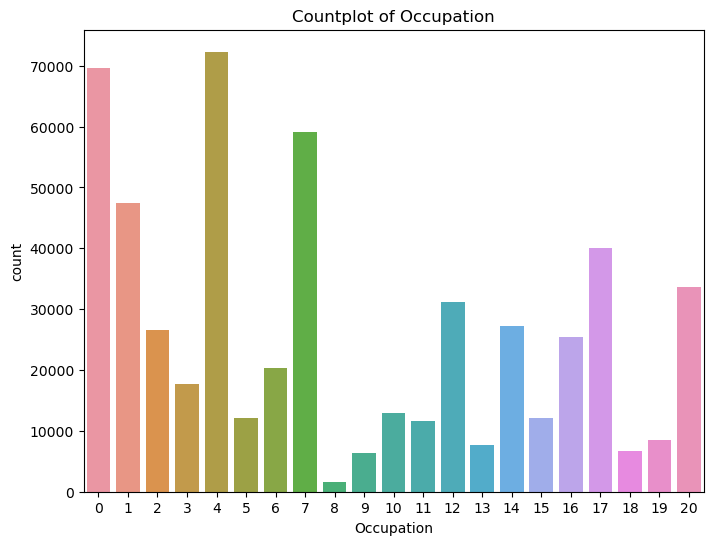

In [41]:
#Countplot for the Occupation column
plt.figure(figsize=(8,6))
sns.countplot(x="Occupation",data=df)
plt.title('Countplot of Occupation')
plt.xlabel('Occupation')
plt.ylabel('count')
plt.show()

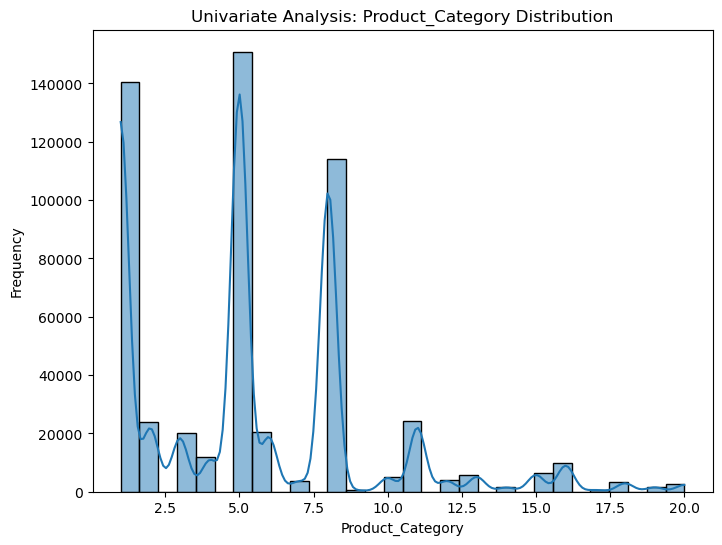

In [6]:
#plot a histogram for Age column
plt.figure(figsize=(8,6))
sns.histplot(df['Product_Category'],bins=30,kde=True)
plt.title('Univariate Analysis: Product_Category Distribution')
plt.xlabel('Product_Category')
plt.ylabel('Frequency')
plt.show()

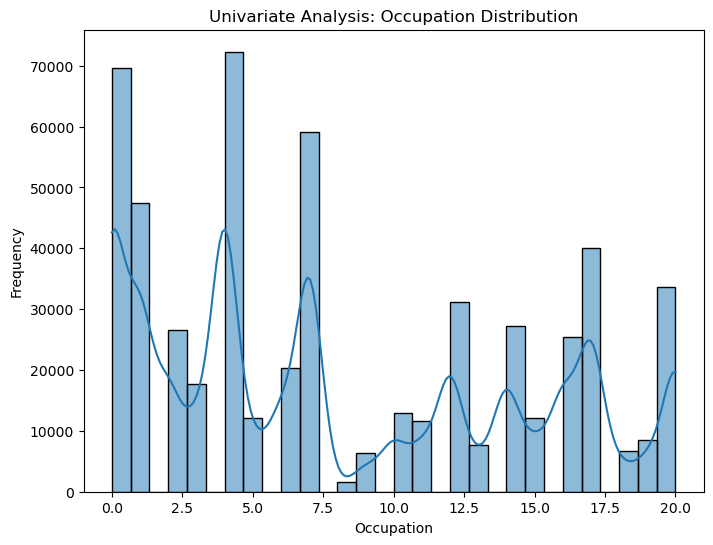

In [8]:
#plot a histogram for Occupation column
plt.figure(figsize=(8,6))
sns.histplot(df['Occupation'],bins=30,kde=True)
plt.title('Univariate Analysis: Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


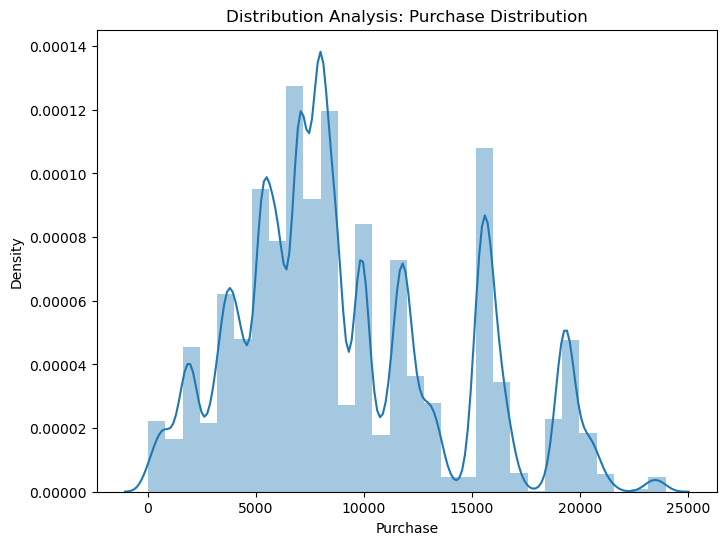

In [9]:
#plot a distributionplot for puchase column
plt.figure(figsize=(8,6))
sns.distplot(df['Purchase'],bins=30,kde=True)
plt.title('Distribution Analysis: Purchase Distribution')
plt.xlabel('Purchase')
plt.ylabel('Density')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


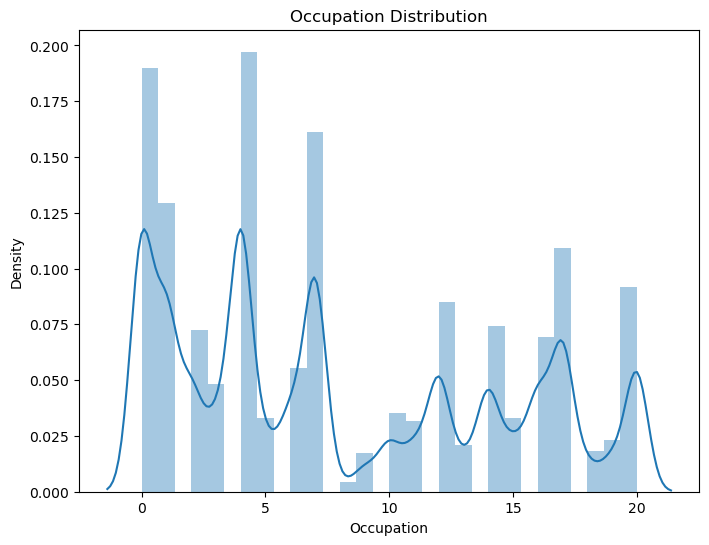

In [10]:
#plot a Distribution for Occupation column
plt.figure(figsize=(8,6))
sns.distplot(df['Occupation'],bins=30,kde=True)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Density')
plt.show()

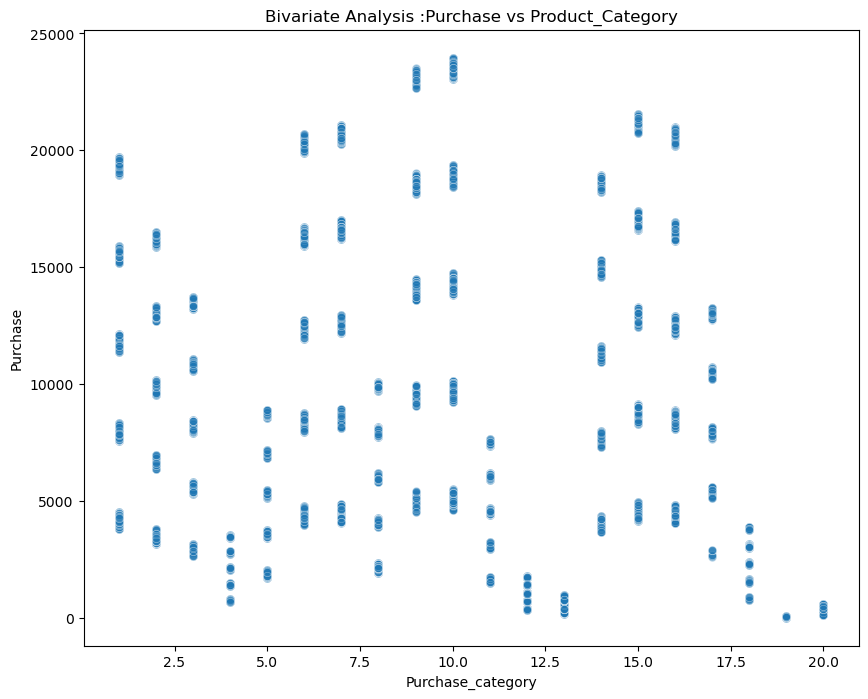

In [14]:
#Bivariate Analysis
#scatter plot for 'Purchase' vs 'Product_Category'
plt.figure(figsize=(10,8))
sns.scatterplot(x='Product_Category',y='Purchase',data=df,alpha=0.5)
plt.title('Bivariate Analysis :Purchase vs Product_Category')
plt.xlabel('Purchase_category')
plt.ylabel('Purchase')
plt.show()

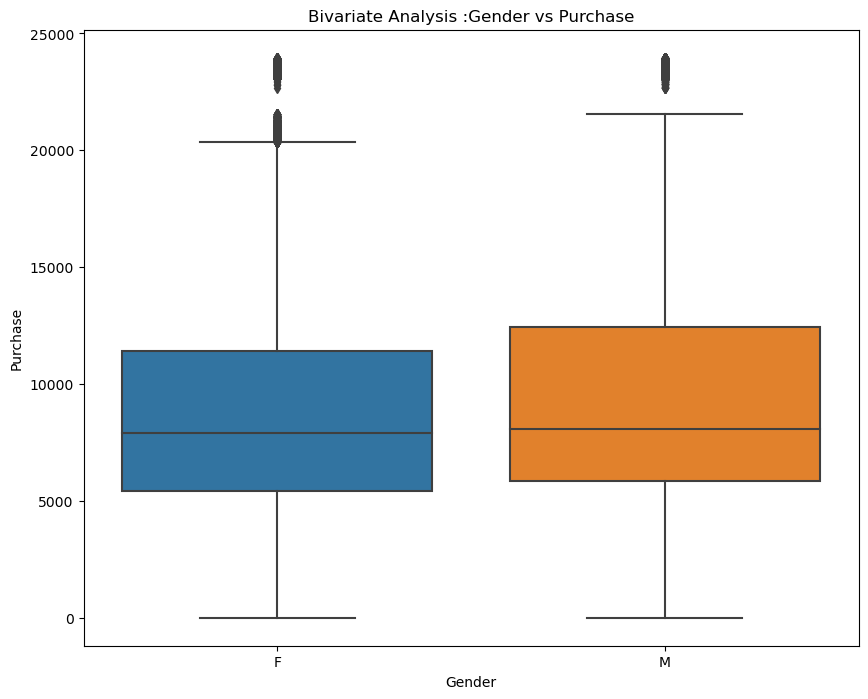

In [15]:
#Box plot for 'Gender' vs 'Purchase'
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender',y='Purchase',data=df)
plt.title('Bivariate Analysis :Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.show()

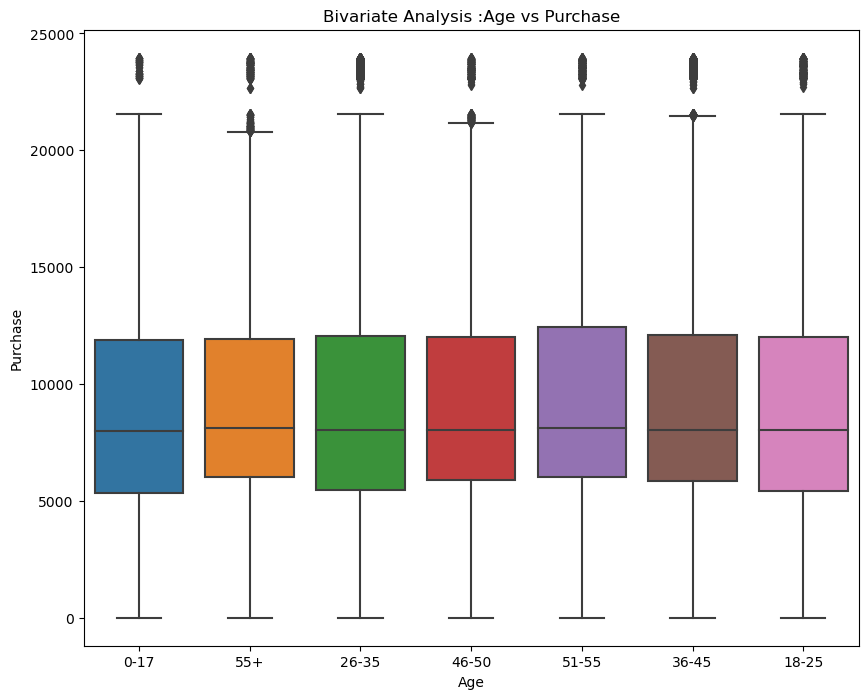

In [16]:
#Box plot for 'Age' vs 'Purchase'
plt.figure(figsize=(10,8))
sns.boxplot(x='Age',y='Purchase',data=df)
plt.title('Bivariate Analysis :Age vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

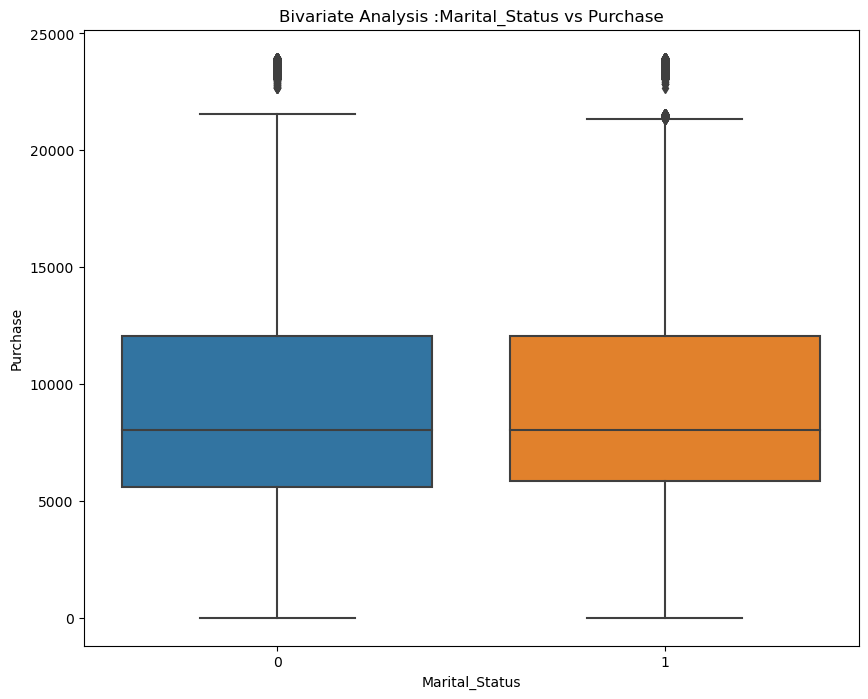

In [18]:
#Box plot for 'Marital_Status' vs 'Purchase'
plt.figure(figsize=(10,8))
sns.boxplot(x='Marital_Status',y='Purchase',data=df)
plt.title('Bivariate Analysis :Marital_Status vs Purchase')
plt.xlabel('Marital_Status')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#Boxplot shows that unmarried peoples have more purchased than married peoples.

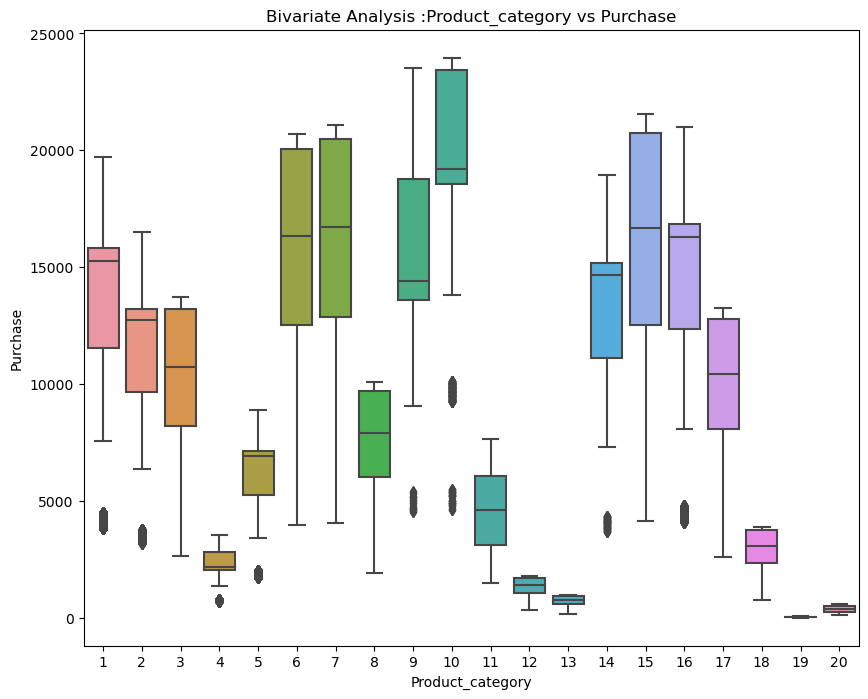

In [19]:
#Box plot for 'Product_Category' vs 'Purchase'
plt.figure(figsize=(10,8))
sns.boxplot(x='Product_Category',y='Purchase',data=df)
plt.title('Bivariate Analysis :Product_category vs Purchase')
plt.xlabel('Product_category')
plt.ylabel('Purchase')
plt.show()

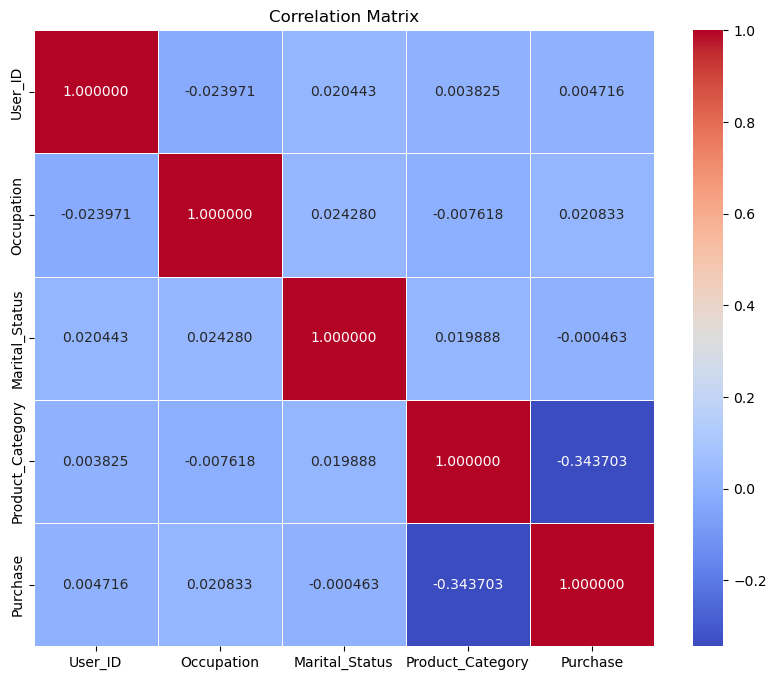

In [20]:
#For Correlation
#compute the correlation matrix
correlation_matrix=df.corr()
#create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt="2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

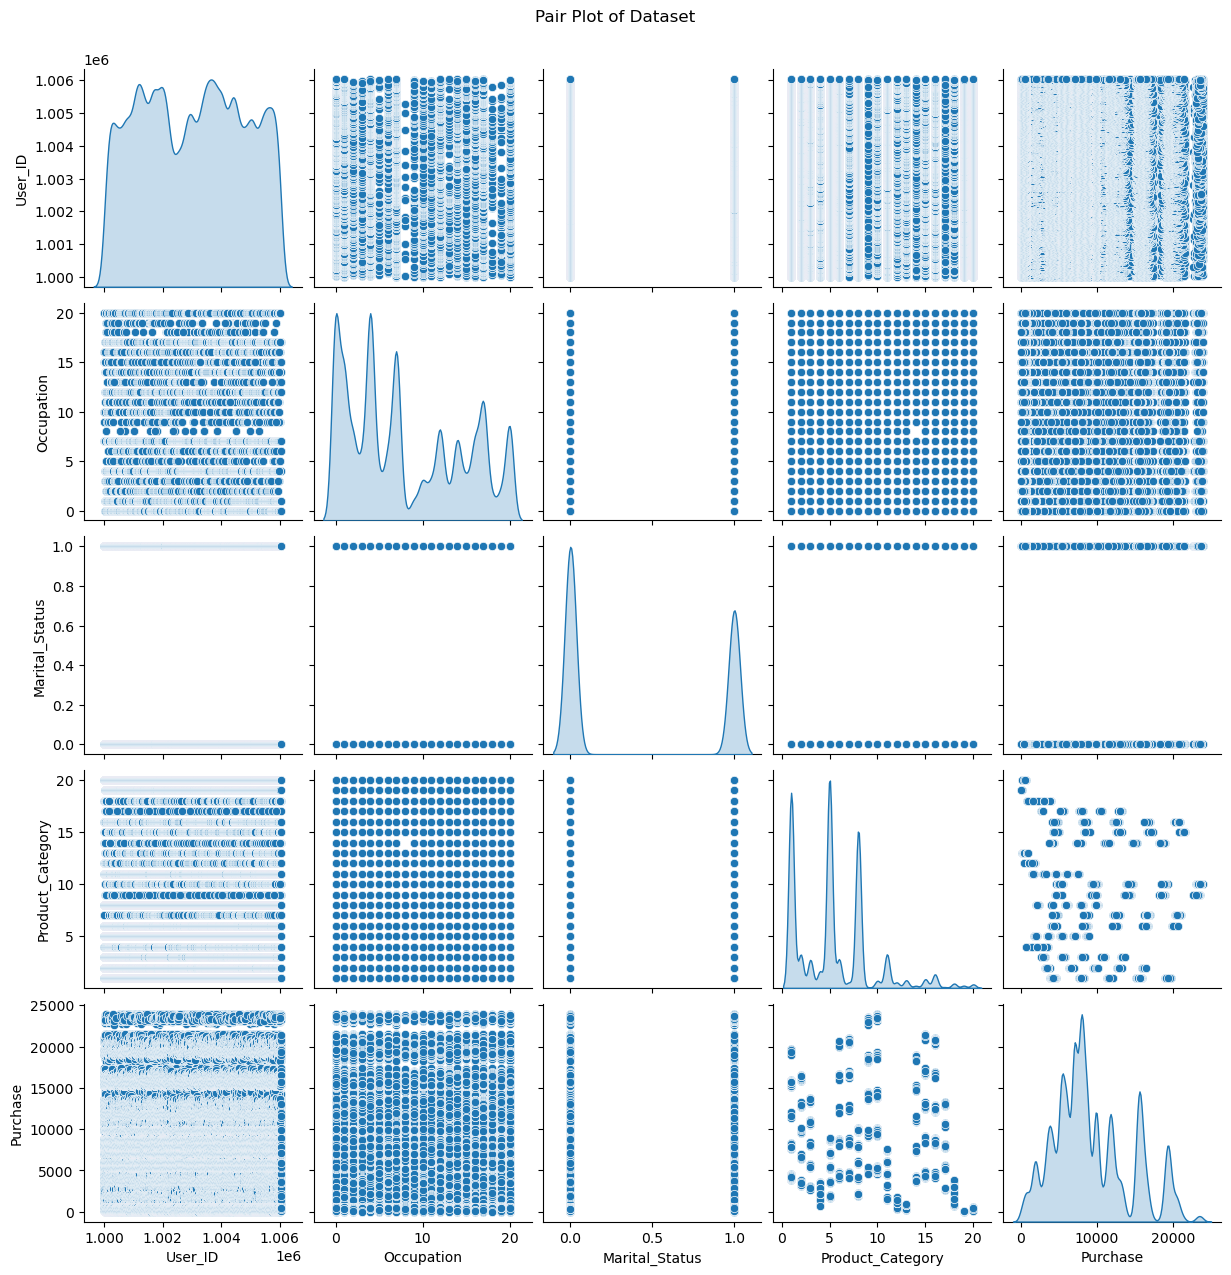

In [21]:
#Pairplot for Numerical Variable
sns.pairplot(df,diag_kind='kde') #'kde' adds kernel density estimates on the diagonal
plt.suptitle('Pair Plot of Dataset',y=1.02)
plt.show()

In [22]:
#for missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

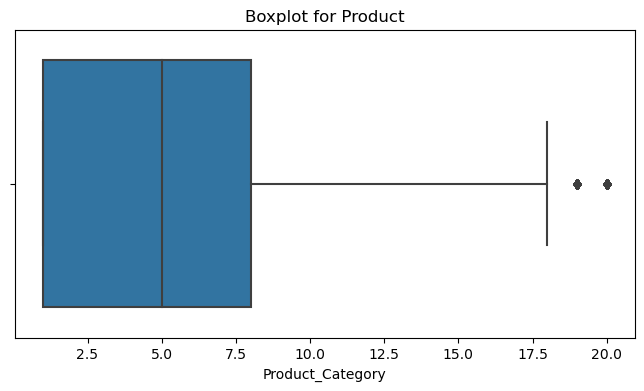

In [23]:
# Create a boxplot(#Detect the outlier)
plt.figure(figsize=(8,4))
sns.boxplot(x="Product_Category",data=df)
plt.title("Boxplot for Product")
plt.show()

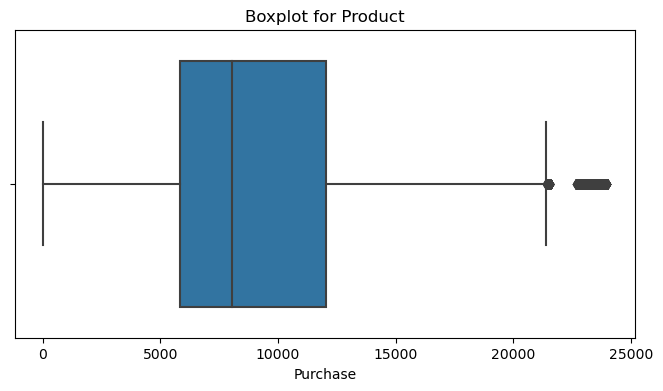

In [26]:
# Create a boxplot(#Detect the outlier)
plt.figure(figsize=(8,4))
sns.boxplot(x="Purchase",data=df)
plt.title("Boxplot for Product")
plt.show()

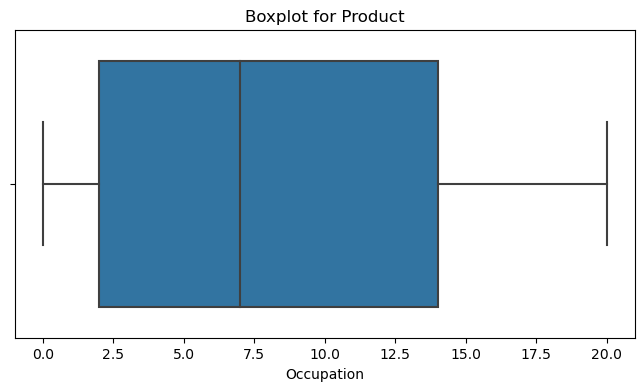

In [27]:
# Create a boxplot(#Detect the outlier)
plt.figure(figsize=(8,4))
sns.boxplot(x="Occupation",data=df)
plt.title("Boxplot for Product")
plt.show()

In [ ]:
#Business Insights based on Non- Graphical and Visual Analysis 

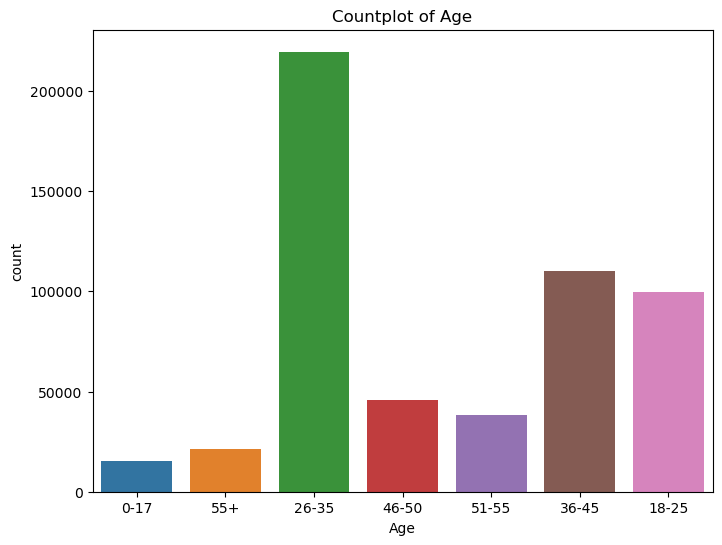

In [31]:
#Comments on the range of attributes:
#for the Age column
plt.figure(figsize=(8,6))
sns.countplot(x="Age",data=df)
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()


In [32]:
#It's shows that people aged between 26 to 35 have purchased the more products 
# and people aged between 0 to 17 have purchased the less products.


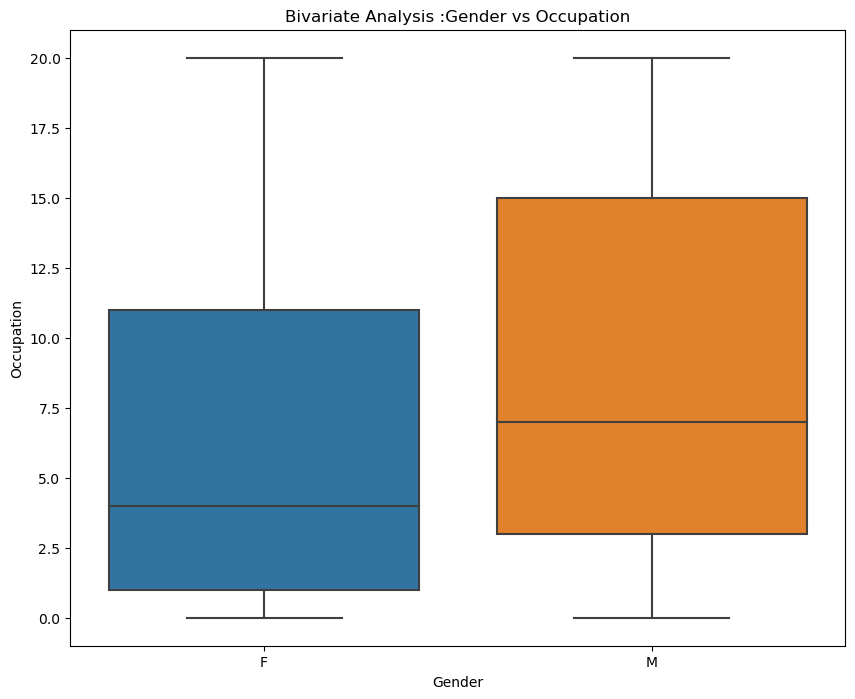

In [37]:
#Comments on the distribution of the variables and relationship between them
#plot for 'Gender' vs 'Purchase'
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender',y='Occupation',data=df)
plt.title('Bivariate Analysis :Gender vs Occupation')
plt.xlabel('Gender')
plt.ylabel('Occupation')
plt.show()

In [38]:
# This Boxplot Distribution shows that male have more occupation compared to female .

In [40]:
#Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

# Filter data for female and male customers
female_data=df[df['Gender']=='F']
male_data=df[df['Gender']=='M']


In [42]:
#Calculate the average amount spent per transaction for female customers
avg_female_exp=female_data['Purchase'].mean()
avg_female_exp

8734.565765155476

In [43]:
#Calculate the average amount spent per transaction for male customers
avg_male_exp=male_data['Purchase'].mean()
avg_male_exp

9437.526040472265

In [44]:
#Result:
#Its clearly shows us male customers have more average expenses compared to females customers.

In [46]:
#Inference after computing the average female and male expenses.
# Inference:
if avg_female_exp>avg_male_exp:
    print("Inference: Female Customers spend more on average.")
elif avg_male_exp> avg_female_exp:
    print("Inference:Male Customers spend more on average.")
else:
    print("Inference:Average spending is similar for both genders.")

Inference:Male Customers spend more on average.


In [47]:
#Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
#Extract the 'Purchase'column for female customers
female_data=df[df["Gender"]=='F']['Purchase']
female_data

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

In [48]:
# Calculate sample mean and standard deviation for female customers
sample_mean_female=female_data.mean()
sample_mean_female

8734.565765155476

In [49]:
# Calculate standard deviation for female customers
sample_std_female=female_data.std()
sample_std_female

4767.233289291444

In [50]:
#Extract the Purchase column
Purchase_data=df['Purchase']
Purchase_data

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [52]:
#Calculate sample mean 
sample_mean=Purchase_data.mean()
sample_mean

9263.968712959126

In [57]:
#standard deviation
sample_std=Purchase_data.std()
sample_std

5023.065393820627

In [76]:
# #Assuming a 95% confidence level
from scipy import stats
Confidence_level=0.95
# Calculate the confidence interval 
Confidence_interval=stats.t.interval(Confidence_level,df=len(Purchase_data)-1,
                                    loc=sample_mean,scale=sample_std/(len(Purchase_data)**0.5))
print("confidence_interval({Confidence_level*100}%):{Confidence_interval}")

confidence_interval({Confidence_level*100}%):{Confidence_interval}


In [61]:
#Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

#Extract the 'Purchase'column for female customers
female_data=df[df["Gender"]=='F']['Purchase']
female_data

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

In [62]:
#Extract the 'Purchase'column for male customers
male_data=df[df["Gender"]=='M']['Purchase']
male_data

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [66]:
#Define the sample size:
sample_size=100
#Number of samples to generate
num_samples=1000
#Generate arrays to store the means of each sample
mean_sample_female=np.zeros(num_samples)
mean_sample_male=np.zeros(num_samples)

In [68]:
#generate random samples and calculate sample means
for i in range(num_samples):
    sample_female=np.random.choice(female_data,size=sample_size,replace=True)
    sample_male=np.random.choice(male_data,size=sample_size,replace=True)
    mean_sample_female[i]=np.mean(sample_female)
    mean_sample_male[i]=np.mean(sample_male)

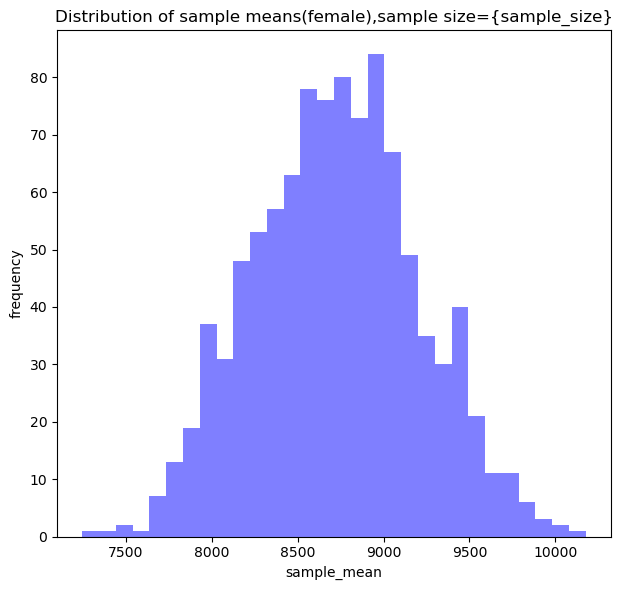

In [74]:
#Plot the distribution of sample means
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(mean_sample_female,bins=30,color='blue',alpha=0.5)
plt.title('Distribution of sample means(female),sample size={sample_size}')
plt.xlabel('sample_mean')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [78]:
#The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

from scipy import stats
Confidence_levels=[0.90,0.95,0.99]
# Calculate and print the confidence intervals for different levels
for confidence_level in Confidence_levels:
    confidence_interval_female=stats.t.interval(confidence_level,df=len(female_data)-1,loc=sample_mean_female,scale=sample_std_female/(len(female_data)**0.5))
    print("Confidence_interval (female,{confidence_level*100}%):{confidence_interval_female}")
    

Confidence_interval (female,{confidence_level*100}%):{confidence_interval_female}
Confidence_interval (female,{confidence_level*100}%):{confidence_interval_female}
Confidence_interval (female,{confidence_level*100}%):{confidence_interval_female}


In [80]:
#Calculate the sample mean and standard deviation for feamle and male customers
sample_mean_female=female_data.mean()
sample_std_female=female_data.std()
sample_size_female=len(female_data)
sample_mean_male=male_data.mean()
sample_std_male=male_data.std()
sample_size_male=len(male_data)

In [81]:
#Calculate the confidenc intervals for female and male customers
confidence_interval_female=stats.t.interval(confidence_level,df=sample_mean_female-1,loc=sample_mean_female,
                                           scale=sample_std_female/
                                           (sample_size_female**0.5))
confidence_interval_male=stats.t.interval(confidence_level,df=sample_size_male-1,loc=sample_mean_male,
                                         scale=sample_std_male/
                                         (sample_size_male**0.5))
print("Confidence Interval(Female):{confidenec_interval_female}")
print("Confidence Interval(Male):{confidence_interval_male}")



Confidence Interval(Female):{confidenec_interval_female}
Confidence Interval(Male):{confidence_interval_male}


In [83]:
#check if confidence intervals overlap
overlap=(confidence_interval_female[1]>=confidence_interval_male[0]) and (confidence_interval_male[1]>=confidence_interval_female[0])
overlap

False

In [88]:
# Print Conclusion
if overlap:
    print("Conclusion: The confidence intervals overlap,suggesting no significant between male and female customers.")
else:
    print("Conclusion: The confidence intervals do not overlap,suggesting a potential difference in average spending between male and female customers.")
          

Conclusion: The confidence intervals do not overlap,suggesting a potential difference in average spending between male and female customers.


In [89]:
#Walmart can leverage this conclusion to make changes or improvements in marketing strategies,product offerings or promotions targeted at specific genders.         

In [94]:
#Perform the same activity for Married vs Unmarried and Age
#For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

#Extract the 'Purchase' column for married and unmarried customers
married_data=df[df['Marital_Status']=='Married']['Purchase']
unmarried_data=df[df['Marital_Status']=='Unmarried']['Purchase']


In [125]:
#Define age bins
age_bins=[0,17,25,35,50,float('inf')]
age_labels=['0-17','18-25','26-35','36-50','51+']
age_bins


[0, 17, 25, 35, 50, inf]

In [126]:
age_labels

['0-17', '18-25', '26-35', '36-50', '51+']

In [100]:
#Calculate the print confidence intervals for married and unmarried customers
for Marital_Status,df in (['Married','Unmarried'],[married_data,unmarried_data]):
    sample_size=len(df)

In [122]:
def calculate_ci(df,confidence=0.95):
    mean=df.mean()
    z_critical=stats.norm.pdf((1+confidence)/2)
    margin_of_error=z_critical*(df.std()/(len(df)**0.5))
    confidence_interval=(mean-margin_of_error,mean+margin_of_error)
    return confidence_interval

In [ ]:
confidence_level=0.95
confidence_interval_married=calculate_ci(married_data,confidence_level)
confidence_interval_Unmarried=calculate_ci(unmarried_data,confidence_level)
print("confidence interval(Married):{confidence_interval_married}")
print("confidence interval(unmarried):{confidence_interval_unmarried}")


In [134]:
#Final Insights
# 1.Distribution shows that unmarried peoples have purchased more than married peoples.
# 2.People purchased more products which price lies between 5000 to 15000.
# 3.Walmart might benefit from a diverse marketing strategy targeting a broad age range,but age-specific promotions could still be effective.
# 4.Walmart can maintain a general marketing strategy,but personalized promotions based on individual preferences might still be beneficial.
# 5.Male customers have more average expenses compared to females customers.
# 6.Above Distribution shows that male have more occupation compared to female.
# 7.people aged between 26 to 35 have purchased the more products and people aged between 0 to 17 have purchased the less products.
# 8.In walmart dataset female customers are more than male customers.

In [ ]:
# Recommendations
#1. Walmart can make marketing strategy for targeting a broad age range .
#2. Walmart can maintaining general strategy to promote the products based on indivisual preferences.
#3. We can reduced the product price for enhance the sales.
#4. We can make some strategies to sell the products to married peoples.
#5. Walmart can leverage this conclusion to make changes or improvements in marketing strategies,product offerings or promotions targeted at specific genders.         